<a href="https://colab.research.google.com/github/Ghimanshigit03/McDonaldEDA/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import sklearn as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/mcdonalds.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1453, 15)

In [ ]:
data.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [ ]:
data['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [ ]:
data['VisitFrequency'].nunique()

6

In [ ]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [ ]:
data['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [ ]:
data['Like'].nunique()

11

In [ ]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
data.loc[1].values

array(['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', '+2', 51, 'Every three months', 'Female'], dtype=object)

**MISSING VALUES**

In [ ]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

**DATA TYPES**

In [ ]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

**FEATURE ENGINEERING**

In [ ]:
# Convert the selected columns to a matrix
x = np.array(data.iloc[:, 0:11])

# Convert "Yes" to 1 and "No" to 0
x = (x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
col_means = np.round(np.mean(x, axis=0), 2)

# Create a DataFrame to display the results
result = pd.DataFrame(col_means, index=data.columns[0:11], columns=["Column Mean"])
print(result)

            Column Mean
yummy              0.55
convenient         0.91
spicy              0.09
fattening          0.87
greasy             0.53
fast               0.90
cheap              0.60
tasty              0.64
expensive          0.36
healthy            0.20
disgusting         0.24


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
x=data.iloc[:,:11].values
x=x.reshape(-1,1)
label_encoder_x= LabelEncoder()
x[:, 0]= label_encoder_x.fit_transform(x[:, 0])
#Encoding for dummy variables
onehot_encoder= OneHotEncoder()
x= onehot_encoder.fit_transform(x).toarray()
print(x)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


**VISUALISATION THROUGH GRAPHS**

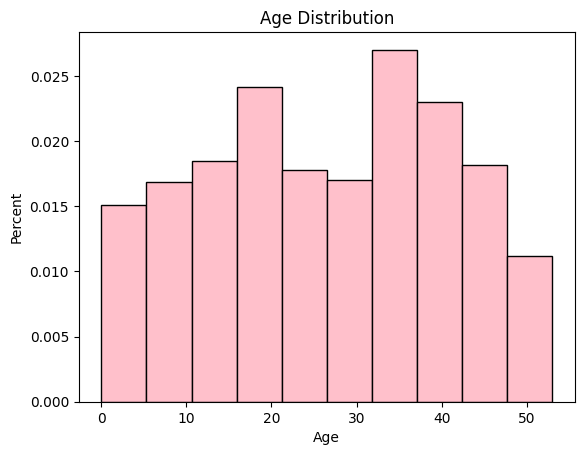

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], density=True, bins=10, color='pink',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Percent')
plt.title('Age Distribution')
plt.show()

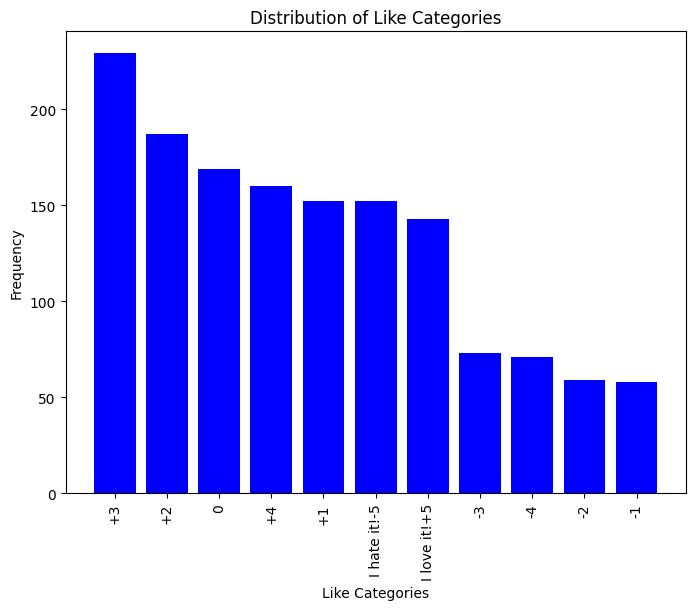

In [ ]:
like_counts = data['Like'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(like_counts.index, like_counts.values, color='blue')

# Customize the plot
plt.xlabel('Like Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Like Categories')
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

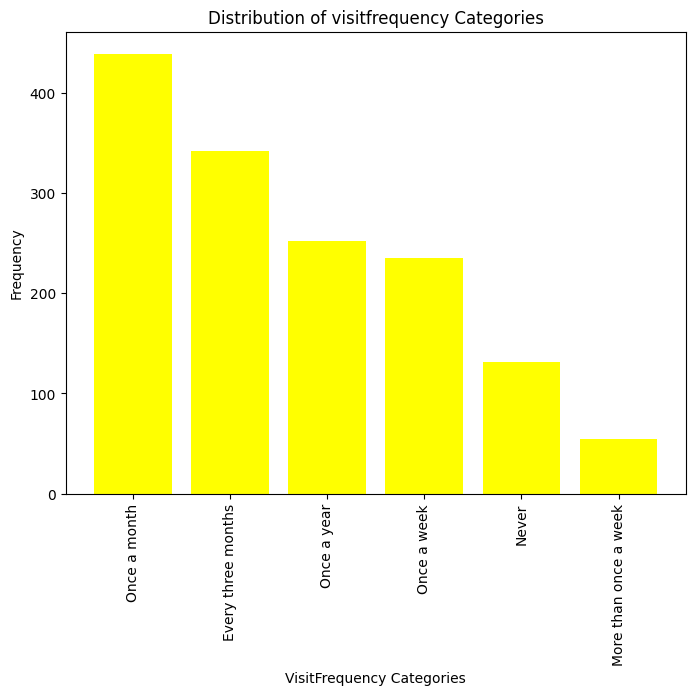

In [ ]:
visit_frequency_count = data['VisitFrequency'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(visit_frequency_count.index, visit_frequency_count.values, color='yellow')

# Customize the plot
plt.xlabel('VisitFrequency Categories')
plt.ylabel('Frequency')
plt.title('Distribution of visitfrequency Categories')
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

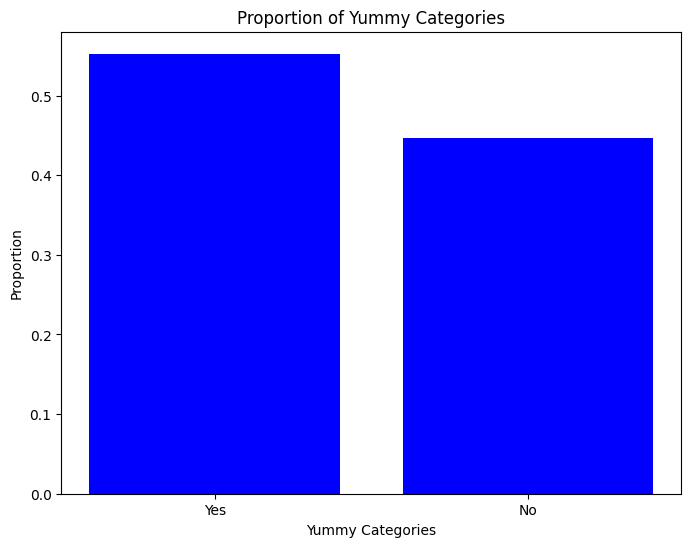

In [ ]:
proportions = data['yummy'].value_counts(normalize=True)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(proportions.index, proportions.values, color='blue')

# Customize the plot
plt.xlabel('Yummy Categories')
plt.ylabel('Proportion')
plt.title('Proportion of Yummy Categories')

# Display the plot
plt.show()

# similary we can plot graph for other categories like "Yummy", "Convenient", "Spicy", "Fattening", "Greasy", "Fast", "Cheap", "Tasty", "Expensive", "Healthy" and "Disgusting"

**CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
k_values = range(2, 9)

best_model = None
best_score = -np.inf

# Perform stepwise k-means clustering
for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(x)
    score = model.score(x)

    # Track the best model based on score
    if score > best_score:
        best_score = score
        best_model = model

# Relabel the clusters
labels = best_model.labels_

# Print the cluster labels
print(labels)

[0 1 0 ... 1 0 1]


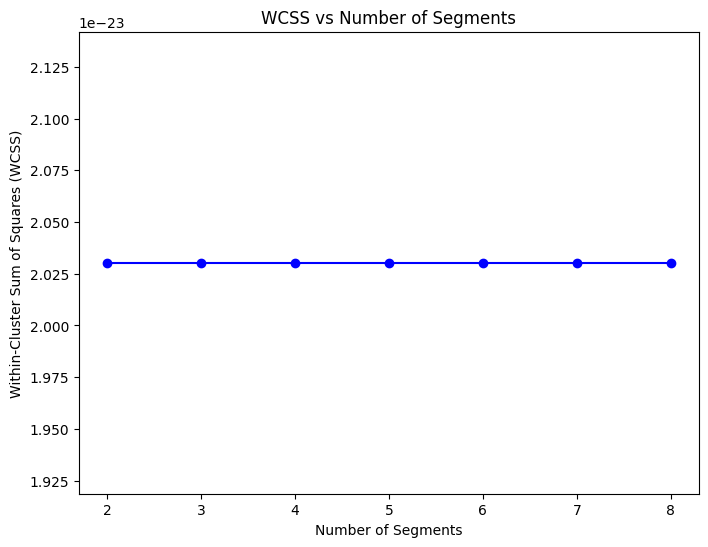

In [ ]:
wcss = []
k_values = range(2, 9)

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(x)
    wcss.append(model.inertia_)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='blue')

# Customize the plot
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs Number of Segments')
plt.xticks(k_values)

# Display the plot
plt.show()